<a href="https://colab.research.google.com/github/ClovisSantiago/Projetos-Data-Science/blob/main/Analisando_os_Dados_do_Airbnb_da_cidade_de_Porto_Portugal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="250%" src="https://www.the-yeatman-hotel.com/fotos/gca/historia_porto_final_10665269458dd3cd32d4bd.jpg">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Porto*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Porto/Portugal, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/portugal/norte/porto/2021-10-15/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,41339,Porto city flat near the sea,180050,Paula,PORTO,Lordelo do Ouro e Massarelos,41.15010,-8.66035,Entire home/apt,75,5,17,2018-08-19,0.18,1,113,0,29049/AL
1,55111,Fontielas Houses |Floor1 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17481,-8.35362,Entire home/apt,66,3,14,2019-05-07,0.18,3,0,0,7563/AL
2,73828,Fontielas Houses |Floor0 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17449,-8.35426,Entire home/apt,66,3,8,2019-07-22,0.10,3,0,0,7563/AL
3,86388,A Formosa - a nest made for two,185209,João,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.14918,-8.60922,Private room,18,2,140,2019-04-26,1.17,6,338,4,6995/AL
4,87873,Oporto Apartment Triplex,480980,Paula,PORTO,Bonfim,41.15786,-8.60427,Entire home/apt,73,3,186,2019-01-05,1.62,3,326,3,634/AL


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]) )
print("Variáveis:\t {}".format(df.shape[1]) )

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 10772
Variáveis:	 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível perceber que as variáveis que mais apresentam valores ausentes no dataset são `reviews_per_month` e `last_review` com aproximadamente 15% valores nulos cada uma.
* A variável `license` possue 8,39% de valores nulos.
* As vaiáveis `name` e `host_name` possuem 0.01% de seus valores nulos.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100

reviews_per_month                 15.493873
last_review                       15.493873
license                            8.392128
name                               0.009283
host_name                          0.009283
longitude                          0.000000
host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
room_type                          0.000000
number_of_reviews_ltm              0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
id                                 0.000000
dtype: float64

### **Q3. Qual a média dos preços de aluguel?**

In [6]:
# ver a média da coluna `price``
df.price.mean()

89.22744151503899

### **Q4. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, iremos plotar o histograma.

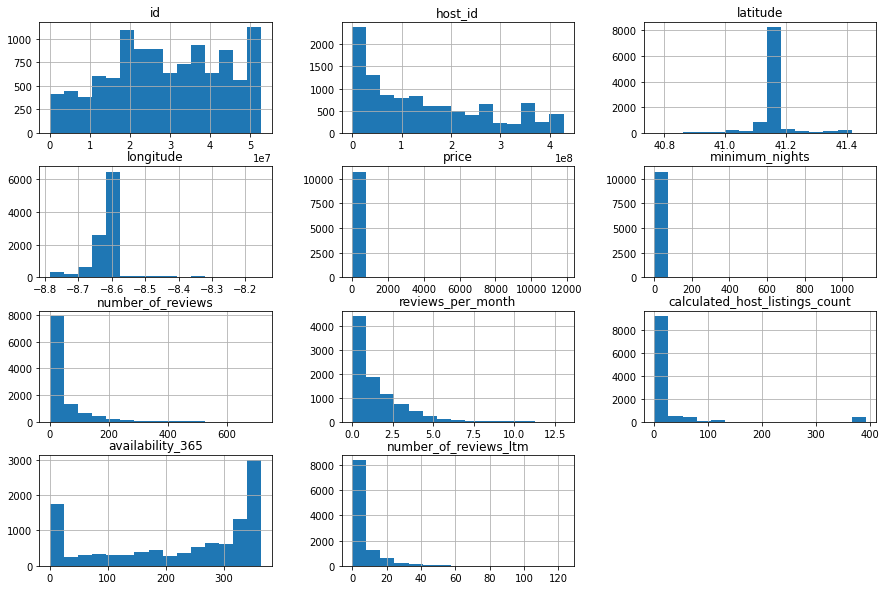

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15,figsize=(15,10));

### **Q5. Há *outliers* presentes?**
Pela distribuição do histograma podemos observar indícios da presença de outliers a exemplo das variáveis **price** e **minimum_nigths**.
Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.  

In [8]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,10772.000000,10772.000000,10772.000000,9103.000000,10772.000000,10772.000000
mean,89.227442,3.619569,42.809042,1.420673,24.961753,223.230412
std,331.179334,24.320549,71.188782,1.502300,73.934077,133.458779
min,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,41.000000,1.000000,2.000000,0.300000,1.000000,102.000000
50%,60.000000,2.000000,12.000000,0.920000,4.000000,278.000000
75%,86.000000,2.000000,51.250000,2.070000,11.000000,344.000000
max,11799.000000,1124.000000,718.000000,13.040000,392.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 86 euros, porém seu valor máximo é 11799 euros.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

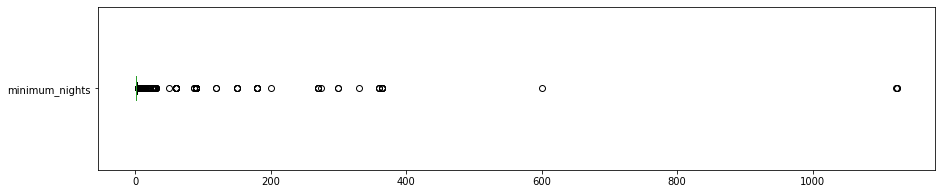


minimum_nights: valores acima de 15:
212 entradas
1.9681%


In [9]:
# minimum_nights
df.minimum_nights.plot(kind='box',vert=False,figsize=(15,3));
plt.show()

# Ver quantidade de valores acima de 15 dias para a variável minimum_nights
print('\nminimum_nights: valores acima de 15:')
print('{} entradas'.format(len(df[df.minimum_nights > 15])))
print('{:.4f}%'.format((len(df[df.minimum_nights > 15]) / df.shape[0]) * 100 ))

#### Boxplot para price

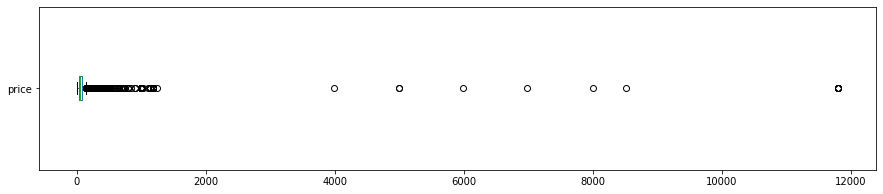


price: valores acima de 450
97 entradas
0.9005%


In [10]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 450 para price
print("\nprice: valores acima de 450")
print("{} entradas".format(len(df[df.price > 450])))
print("{:.4f}%".format((len(df[df.price > 450]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Após identificarmos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

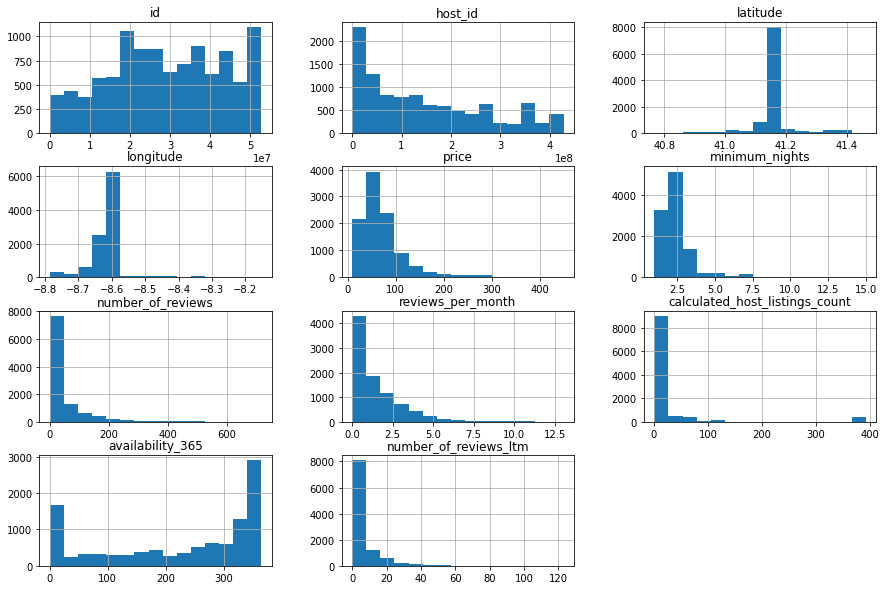

In [11]:
# Remover os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 450].index , axis=0 , inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 15].index , axis=0 , inplace= True)

# Plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15,figsize=(15,10));

### **Q6. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [12]:
# criar uma matriz de correlação
corr = df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()
display(corr);

# mostrar a matriz de correlação


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.024870,-0.123538,-0.160801,-0.099655,0.116220
minimum_nights,0.024870,1.000000,-0.036345,-0.147370,-0.087390,-0.109863
number_of_reviews,-0.123538,-0.036345,1.000000,0.602556,0.057933,-0.001316
reviews_per_month,-0.160801,-0.147370,0.602556,1.000000,0.177104,0.084376
calculated_host_listings_count,-0.099655,-0.087390,0.057933,0.177104,1.000000,0.104495
availability_365,0.116220,-0.109863,-0.001316,0.084376,0.104495,1.000000


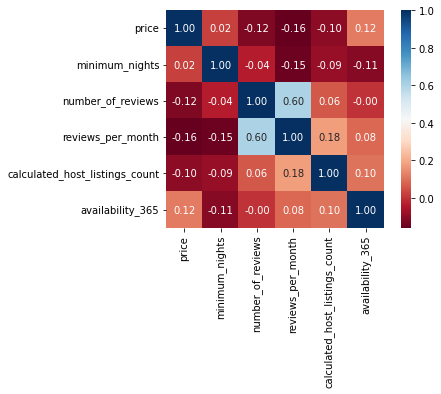

In [13]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu',fmt='.2f', square=True, linecolor='white',annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().

In [14]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    8337
Private room       1898
Hotel room          151
Shared room          97
Name: room_type, dtype: int64

In [15]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.795288
Private room       0.181055
Hotel room         0.014404
Shared room        0.009253
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara de Porto/Portugal?**



In [19]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Negrelos (São Tomé)                          450.000000
Cristelo                                     292.000000
Vila Nova do Campo                           250.000000
Recarei                                      250.000000
São Miguel do Mato                           225.666667
Melres e Medas                               207.312500
São Pedro de Castelões                       206.000000
Tropeço                                      206.000000
Fermedo                                      185.555556
Bagunte, Ferreiró, Outeiro Maior e Parada    182.666667
Name: price, dtype: float64

In [36]:
# ver a quantidade de imóveis no Negrelos (São Tomé)
print(df_clean[df_clean.neighbourhood == 'Negrelos (São Tomé)'].shape)
# ver as entradas de Cristelo
df_clean[df_clean.neighbourhood == 'Cristelo']

(1, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
8434,43323216,Villa 263-Moradia T3 - Piscina Privada e Vista...,123428989,Sérgio,PAREDES,Cristelo,41.23119,-8.36393,Entire home/apt,292,5,0,NaN,NaN,1,162,0,2611/AL


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

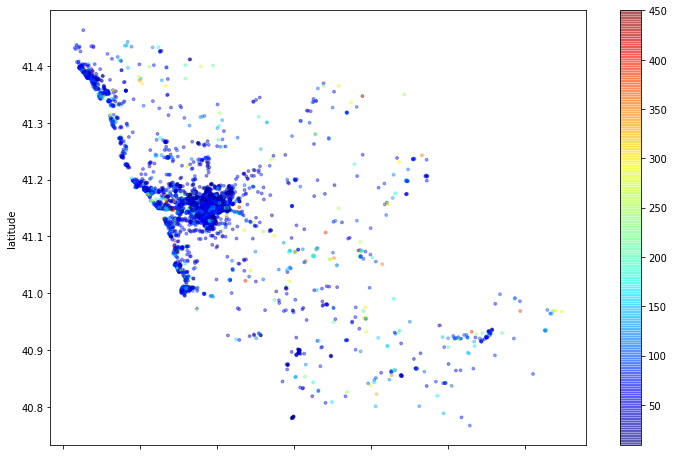

In [20]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [21]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

2.061623581035963

### Conclusões


Ao realizarmos esta análise exploratória dos dados fornecidos pelo Airbnb referente à cidade de Porto percebemos que existem alguns outliers nas variáveis de **price** e **minimun_nights** presentes no dataset o que poderiam comprometer a qualidade das análises. Decidimos por limpar esses outliers de maneira que conseguimos deixar o dataset mais normalizado no tocante a essas variáveis.


Foi observado também que em algumas localidades há poucos imóveis disponíveis para locação o que pode afetar a análise de preço médio por bairro a exemplo da questão Q8 onde vimos por exemplo que os bairros de **Negrelos (São Tomé)** e **Cristelo** aparecem com as médias mais elevadas, mas que ao colocar uma lupa, percebemos que só há apenas 1 imóvel disponível para locação nestes bairros.


Concluímos, portanto, lembrando que este conjunto de dados é um conjunto resumido com apenas 18 variáveis o que nos permite apenas uma análise superficial dos dados. Para uma análise mais aprofundada recomenda-se trabalhar com o comjunto de dados mais completo fornceido pela Airbnb e que contém 106 variáveis disponíveis. 